In [ ]:
#####################################################################################
## HW3: Question 2
## Author: Sai Lone
## Created: 11/29
## Edited:  
#####################################################################################

In [1]:
rm(list = ls())

# set working director
setwd("/Users/sailone/Desktop/fall19/EAS506/HW4")

In [40]:
# install.packages("rpart")
# install.packages("MASS")
# install.packages("tree")



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [41]:
library("rpart")
library(MASS)

In [68]:
wine = read.csv('wine.data',header = FALSE)

In [70]:
dim(wine)
head(wine)
# Let's change column
colnames(wine) <- c("Cultivar", 
                        "Alcohol",
                        "MalicAcid",
                        "Ash",
                        "AlcAsh",
                        "Mg",
                        "Phenols",
                        "Flavanoids",
                        "Nonflavanoid_Phenols",
                        "Proanthocyanins",
                        "Color",
                        "Hue",
                        "OD",
                        "Proline")
names(wine)

[1] 178  14

V1 V2    V3   V4   V5   V6  V7   V8   V9   V10  V11  V12  V13  V14 
1 1  14.23 1.71 2.43 15.6 127 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065
2 1  13.20 1.78 2.14 11.2 100 2.65 2.76 0.26 1.28 4.38 1.05 3.40 1050
3 1  13.16 2.36 2.67 18.6 101 2.80 3.24 0.30 2.81 5.68 1.03 3.17 1185
4 1  14.37 1.95 2.50 16.8 113 3.85 3.49 0.24 2.18 7.80 0.86 3.45 1480
5 1  13.24 2.59 2.87 21.0 118 2.80 2.69 0.39 1.82 4.32 1.04 2.93  735
6 1  14.20 1.76 2.45 15.2 112 3.27 3.39 0.34 1.97 6.75 1.05 2.85 1450

[1] "Cultivar"             "Alcohol"              "MalicAcid"           
 [4] "Ash"                  "AlcAsh"               "Mg"                  
 [7] "Phenols"              "Flavanoids"           "Nonflavanoid_Phenols"
[10] "Proanthocyanins"      "Color"                "Hue"                 
[13] "OD"                   "Proline"

In [71]:
set.seed(1)

model.control <- rpart.control(minsplit = 5, xval = 10, cp = 0)
fit.wine <- rpart(Cultivar~., data = wine, method = "class", control = model.control)


In [72]:
names(fit.wine)

[1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"

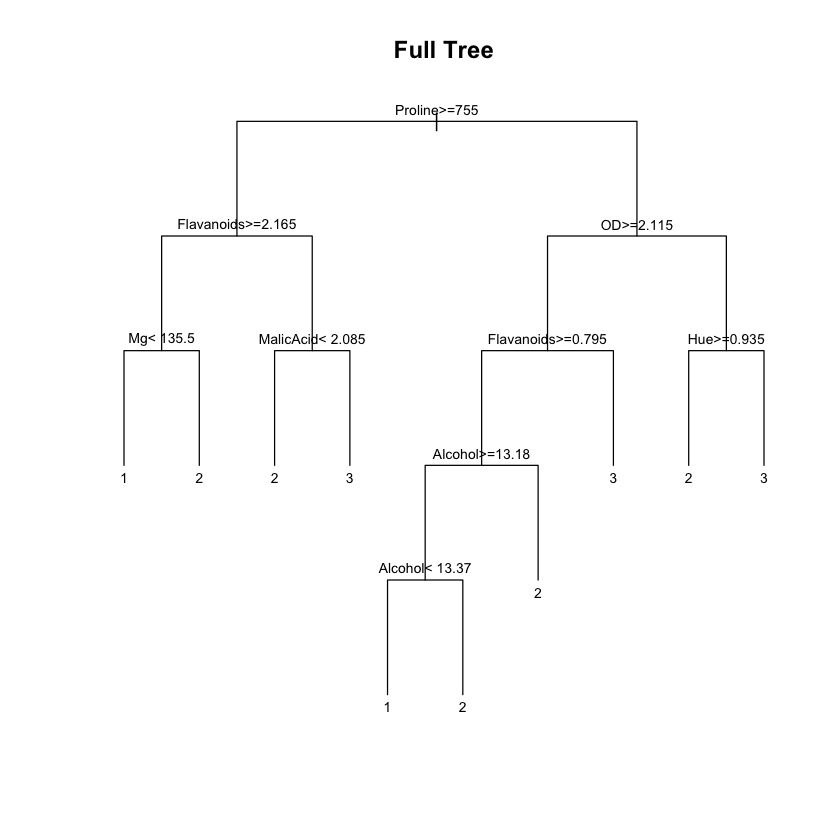

In [73]:
# let's construct the full-size classification tree for this dataset.
plot(fit.wine, uniform = T, compress = T, main = "Full Tree")
text(fit.wine, cex = .7)

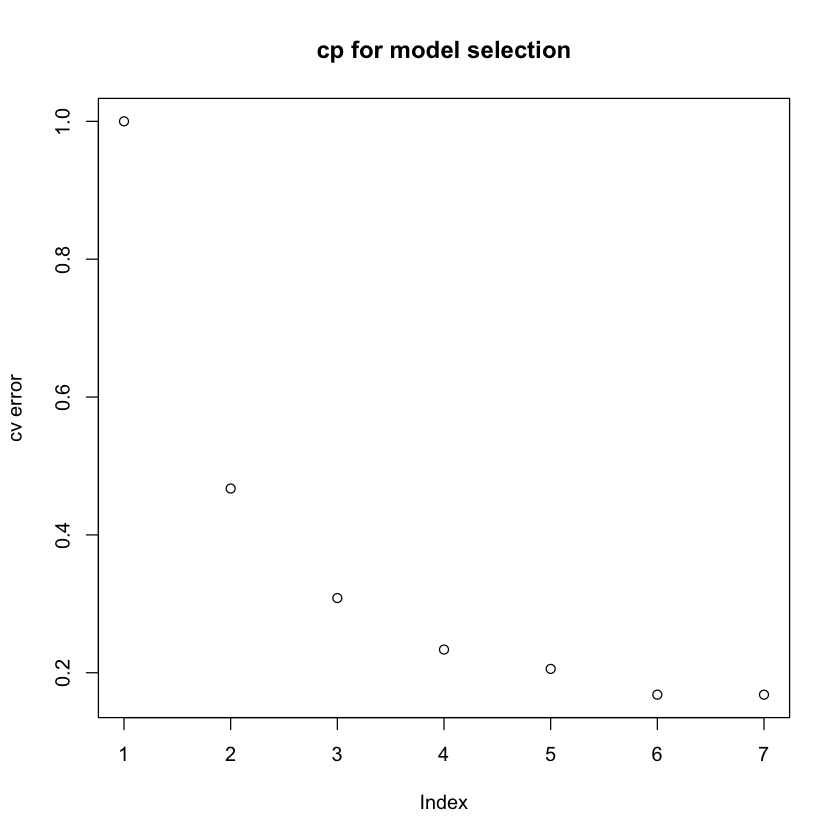

In [47]:
# Now let's prune it to the appropriate size
plot(fit.wine$cptable[,4], main = "cp for model selection", ylab = "cv error")


In [74]:
min_cp = which.min(fit.wine_data$cptable[,4]) # 6
pruned_fit_wine <- prune(fit.wine, cp = fit.wine$cptable[min_cp,1])


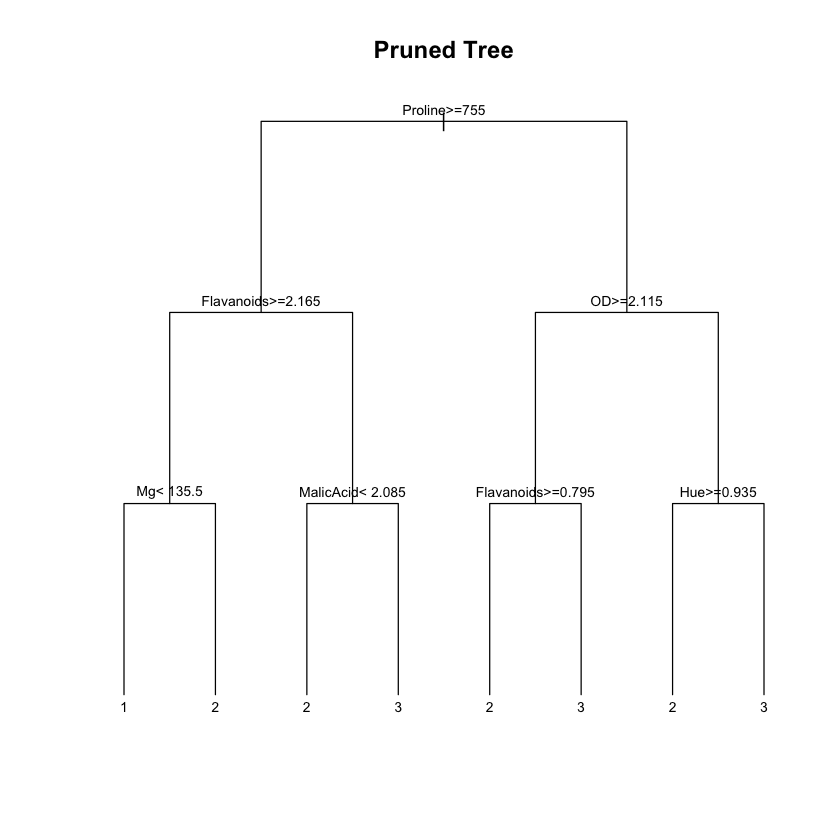

In [76]:
# plot the full tree and the pruned tree
plot(pruned_fit_wine,uniform = T, compress = T, main = "Pruned Tree")
text(pruned_fit_wine, cex = .7)

In [64]:
# Number of testing samples in each node can be seen here
summary(pruned_fit_wine)

Call:
rpart(formula = Cultivar ~ ., data = wine_data, method = "class", 
    control = model.control)
  n= 178 

           CP nsplit  rel error    xerror       xstd
1 0.495327103      0 1.00000000 1.0000000 0.06105585
2 0.317757009      1 0.50467290 0.4672897 0.05603975
3 0.056074766      2 0.18691589 0.3084112 0.04845596
4 0.037383178      3 0.13084112 0.2336449 0.04332334
5 0.018691589      4 0.09345794 0.2056075 0.04103740
6 0.009345794      7 0.03738318 0.1682243 0.03759261

Variable importance
     Flavanoids              OD         Proline         Alcohol             Hue 
             18              15              12              11              10 
          Color         Phenols Proanthocyanins          AlcAsh       MalicAcid 
             10               7               7               6               2 
             Mg             Ash 
              1               1 

Node number 1: 178 observations,    complexity param=0.4953271
  predicted class=2  expected loss=0.6011

In [65]:

summary(fit.wine_data)

Call:
rpart(formula = Cultivar ~ ., data = wine_data, method = "class", 
    control = model.control)
  n= 178 

           CP nsplit  rel error    xerror       xstd
1 0.495327103      0 1.00000000 1.0000000 0.06105585
2 0.317757009      1 0.50467290 0.4672897 0.05603975
3 0.056074766      2 0.18691589 0.3084112 0.04845596
4 0.037383178      3 0.13084112 0.2336449 0.04332334
5 0.018691589      4 0.09345794 0.2056075 0.04103740
6 0.009345794      7 0.03738318 0.1682243 0.03759261
7 0.000000000      9 0.01869159 0.1682243 0.03759261

Variable importance
     Flavanoids              OD         Alcohol         Proline           Color 
             18              14              12              12              10 
            Hue         Phenols Proanthocyanins          AlcAsh       MalicAcid 
             10               7               7               5               2 
             Mg             Ash 
              2               1 

Node number 1: 178 observations,    complexity para